# The St. Petersburg Paradox in Python

## By Zane Jakobs



# What is the St. Petersburg paradox?

Consider the following game: a coin is flipped until it lands on heads, on the $n$-th flip. The player is then paid $2^n$ dollars. As smart casino owners, we want to figure out how much we should charge people to play this game--that is, what's the expected value of this game? 

In the language of statistics, we want to compute $\mathbb{E}[2^X],$ where $X\sim \text{Geom}(p = \frac{1}{2})$ is the random variable representing the probability of the game ending on the $n$-th roll, which has the p.d.f (or p.m.f., if you like that name better)
$$ F_X(x) = \left(\dfrac{1}{2}\right)^x.$$
This expectation can then be computed directly, giving us
$$\mathbb{E}[2^X] = \sum\limits_{i = 1}^{\infty} 2^x \left(\dfrac{1}{2}\right)^x = \sum\limits_{i = 1}^{\infty} 1,$$
which clearly diverges. 

Wait, what? How can the expected winnings be infinite? This is the St. Petersburg (sometimes St. Petersburg Casino) Paradox. But, importantly, do we observe massive winnings in this game in practice? We $\textit{did}$ assume that the game could go in infinitely long, but very long games are very unlikely, so let's simulate a bunch of games and find out what we get!

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numba import jit
import scipy.stats as sps

In [56]:
@jit
def PetersburgParadox(samples, trials):
    avg_payoff = np.zeros(samples)
    
    for i in range(samples):
        for j in range(trials):
            done = False
            count = 1.0
            while not done:
                if np.random.randint(0,high = 2) == 0:
                    avg_payoff[i] = avg_payoff[i] + np.power(2,count)
                    done = True
                else:
                    count = count +1
        avg_payoff[i] = avg_payoff[i]/trials
        
    mu = np.mean(avg_payoff)
    sd = np.std(avg_payoff)
    skewness = sps.skew(avg_payoff)
    kurt = sps.kurtosis(avg_payoff)
    
    print("Through", samples, "samples of", trials ,"trials each, the sample means had the following distribution and statistics:")
    print("Mean:", mu)
    print("Standard Deviation:", sd)
    print("Skewness:",skewness)
    print("Excess Kurtosis:",kurt)

    sns.distplot(avg_payoff, hist = False, kde = True,  kde_kws = {'shade': False, 'linewidth': 1}, color = 'blue')
    plt.title('Density Plot of Average Winnings')
    plt.xlabel('Average Payoff')
    plt.ylabel('Density')

Through 1000 samples of 100000 trials each, the sample means had the following distribution and statistics:
Mean: 26.73312218
Standard Deviation: 43.18457825986659
Skewness: 12.318875820159809
Excess Kurtosis: 176.34492382714723


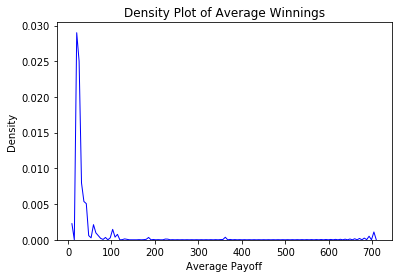

In [58]:
PetersburgParadox(1000,100000)